# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from scipy.stats import ks_2samp
import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [3]:
def plota_bivariada():
    
    #função que retorna um dataframe com os dados de uma bivarada.
    
    tab = pd.crosstab(data[str_res], data[str_exp], margins= True)
    tab['Qtmedia_doentes'] = tab[1]/tab['All']
    tab['Odds'] = tab[1]/tab[0]
    tab['Odds ratio'] = tab['Odds']/tab.loc['All', 'Odds']
    tab['Logito'] = np.log(tab['Odds'])
    tab['WOE'] = np.log(tab['Odds ratio'])
    
    return tab

In [4]:
# - fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)

data = df
str_res = ('fbs')
str_exp = ('flag_doente')
bivariada = plota_bivariada()
bivariada

flag_doente,0,1,All,Qtmedia_doentes,Odds,Odds ratio,Logito,WOE
fbs,,,,,,,,
0.0,141,117,258,0.453488,0.829787,0.979030,-0.186586,-0.021193
1.0,23,22,45,0.488889,0.956522,1.128558,-0.044452,0.120941
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


In [5]:
# - cp: tipo de dor no peito
#  - 1: angina típica
#  - 2: angina atípica
#  - 3: dor não-angina
#  - 4: assintomático

str_res = ('cp')
str_exp = ('flag_doente')
bivariada = plota_bivariada()
bivariada

flag_doente,0,1,All,Qtmedia_doentes,Odds,Odds ratio,Logito,WOE
cp,,,,,,,,
1.0,16,7,23,0.304348,0.437500,0.516187,-0.826679,-0.661286
2.0,41,9,50,0.180000,0.219512,0.258993,-1.516347,-1.350955
3.0,68,18,86,0.209302,0.264706,0.312315,-1.329136,-1.163743
4.0,39,105,144,0.729167,2.692308,3.176536,0.990399,1.155791
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


In [6]:
# - restecg: resultados eletrocardiográficos em repouso
#  - 0: normal
#  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
#  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes

str_res = ('restecg')
str_exp = ('flag_doente')
bivariada = plota_bivariada()
bivariada

flag_doente,0,1,All,Qtmedia_doentes,Odds,Odds ratio,Logito,WOE
restecg,,,,,,,,
0.0,95,56,151,0.370861,0.589474,0.695494,-0.528525,-0.363133
1.0,1,3,4,0.750000,3.000000,3.539568,1.098612,1.264005
2.0,68,80,148,0.540541,1.176471,1.388066,0.162519,0.327911
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [198]:
def plota_bivariada_cut(): 
    
    # função que cria 5 grupos para a variável 'age'.
    
    var_cat = lambda str_res: data.insert(1, 'var_cat', pd.qcut(data[str_res], q=5))

    var_cat(str_res)
    
    #função que retorna um dataframe com os dados de uma bivarada.
    
    tab = pd.crosstab(data['var_cat'], data[str_exp], margins= True)
    tab['Qtmedia_doentes'] = tab[1]/tab['All']
    tab['Odds'] = tab[1]/tab[0]
    tab['Odds ratio'] = tab['Odds']/tab.loc['All', 'Odds']
    tab['Logito'] = np.log(tab['Odds'])
    tab['WOE'] = np.log(tab['Odds ratio'])

    return tab

In [199]:
data = df
str_res = ('age')
str_exp = ('flag_doente')

bivariada_cut = plota_bivariada_cut()

bivariada_cut

flag_doente,0,1,All,Qtmedia_doentes,Odds,Odds ratio,Logito,WOE
var_cat,,,,,,,,
"(28.999, 45.0]",47,16,63,0.253968,0.340426,0.401653,-1.077559,-0.912166
"(45.0, 53.0]",42,22,64,0.343750,0.523810,0.618020,-0.646627,-0.481235
"(53.0, 58.0]",32,39,71,0.549296,1.218750,1.437950,0.197826,0.363218
"(58.0, 62.0]",13,32,45,0.711111,2.461538,2.904261,0.900787,1.066179
"(62.0, 77.0]",30,30,60,0.500000,1.000000,1.179856,0.000000,0.165392
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [9]:
reglog = smf.logit('flag_doente ~ sex + cp + trestbps + age'
                   , data=df).fit()

reglog.summary()

Optimization terminated successfully.
         Current function value: 0.510076
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            4
Date:                Wed, 22 Feb 2023   Pseudo R-squ.:                  0.2605
Time:                        21:55:35   Log-Likelihood:                -154.55
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.264e-22
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.1167      1.608     -6.915      0.000     -14.267      -7.966
sex            1.8021      0.331      5.444      0.000       1.153       2.451
cp             1.1403      0.169      6.739      0.000       0.809       1.472
trestbps       0.0214      0.008      2.600      0.009       0.005       0.037
age            0.0582      0.017      3.348      0.001       0.024       0.092
==============================================================================
"""

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [11]:
# - Calcule a probabilidade de evento predita segundo o seu modelo:

df.drop('var_cat', axis=1, inplace=True)
df['predito'] = reglog.predict(df)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,predito
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,0.196041
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,0.928431
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,0.846558
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,0.276207
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,0.024768


In [12]:
# - Categorize essa probabilidade em G=5 grupos:

cat_pred = pd.qcut(df['predito'], 5, duplicates='drop')
cat_pred.value_counts().sort_index()

(0.0119, 0.146]    61
(0.146, 0.349]     60
(0.349, 0.575]     61
(0.575, 0.772]     60
(0.772, 0.928]     61
Name: predito, dtype: int64

In [15]:
# - Calcule a probabilidade de evento predita média por grupo:

group_reg = df.groupby(cat_pred)
qualid = group_reg[['flag_doente']].count().rename(columns = {'flag_doente': 'contagem'})
qualid

,contagem
predito,
"(0.0119, 0.146]",61
"(0.146, 0.349]",60
"(0.349, 0.575]",61
"(0.575, 0.772]",60
"(0.772, 0.928]",61


In [16]:
qualid['predito'] = group_reg['predito'].mean()
qualid

,contagem,predito
predito,,
"(0.0119, 0.146]",61,0.076255
"(0.146, 0.349]",60,0.249060
"(0.349, 0.575]",61,0.457982
"(0.575, 0.772]",60,0.673059
"(0.772, 0.928]",61,0.837449


In [17]:
# - Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo:

qualid['pct_doente'] = group_reg['flag_doente'].mean()
qualid

,contagem,predito,pct_doente
predito,,,
"(0.0119, 0.146]",61,0.076255,0.098361
"(0.146, 0.349]",60,0.249060,0.183333
"(0.349, 0.575]",61,0.457982,0.491803
"(0.575, 0.772]",60,0.673059,0.683333
"(0.772, 0.928]",61,0.837449,0.836066


Text(0.5, 0, 'Grupo')

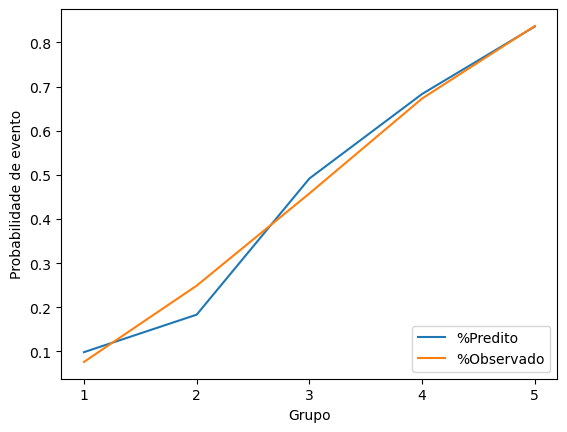

In [18]:
# - Compare graficamente o valor eperado versus observado (para a taxa de maus por grupo):

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid['pct_doente'].plot(label='%Predito')
ax = qualid['predito'].plot(label='%Observado')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')


5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [30]:
acc = metrics.accuracy_score(df['flag_doente'], df['predito']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

##Gini
gini = 2*auc_ -1

#KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito'], df.loc[df['flag_doente'] != 1, 'predito']).statistic

print('GINI: {2:.2f}% \n KS: {0:.2f}%'
      .format(ks*100, auc_*100, gini*100))

Acurácia: 77.89%
GINI: 66.22% 
 KS: 58.40%


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [189]:
#'flag_doente ~ sex + cp + trestbps + age + chol + fbs + restecg + thalach + exang + oldpeak + slope + ca + thal'
#'flag_doente ~ sex + cp + trestbps + age + chol + fbs + restecg + thalach + exang + oldpeak + slope'
#'flag_doente ~ sex + cp + trestbps + age + chol + fbs + restecg + thalach + exang + oldpeak'
#'flag_doente ~ sex + cp + trestbps + age + chol + fbs + restecg + thalach + exang'
#'flag_doente ~ sex + cp + trestbps + age + chol + fbs + restecg + thalach'
#'flag_doente ~ sex + cp + trestbps + age + chol + fbs + restecg'
#'flag_doente ~ sex + cp + trestbps + age + chol + fbs'
#'flag_doente ~ sex + cp + trestbps + age + chol'
#'flag_doente ~ sex + cp + trestbps + age'



reglog = smf.logit('flag_doente ~ sex + cp + trestbps + age + chol + fbs + restecg + thalach + exang + oldpeak + slope + ca + thal', data=df).fit()

reglog.summary()

Optimization terminated successfully.
         Current function value: 0.326870
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      284
Method:                           MLE   Df Model:                           18
Date:                Wed, 22 Feb 2023   Pseudo R-squ.:                  0.5261
Time:                        22:28:06   Log-Likelihood:                -99.042
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.014e-36
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -6.7182      2.934     -2.290      0.022     -12.468      -0.968
ca[T.1.0]       1.9115      0.481      3.975      0.000       0.969       2.854
ca[T.2.0]       3.4183      0.738      4.632      0.000       1.972       4.865
ca[T.3.0]       2.0080      0.848      2.368      0.018       0.346       3.670
ca[T.?]        -0.4958      1.651     -0.300      0.764      -3.731       2.740
thal[T.6.0]     0.0163      0.798      0.020      0.984      -1.548       1.581
thal[T.7.0]     1.4101      0.415      3.400      0.001       0.597       2.223
thal[T.?]       1.8895      1.645      1.149      0.251      -1.334       5.113
sex             1.5811      0.513      3.083      0.002       0.576       2.586
cp              0.6892      0.202      3.416      0.001       0.294       1.085
trestbps        0.0279      0.011      2.504      0.012       0.006       0.050
age            -0.0242      0.024     -0.988      0.323      -0.072       0.024
chol            0.0053      0.004      1.389      0.165      -0.002       0.013
fbs            -0.7441      0.531     -1.400      0.161      -1.786       0.297
restecg         0.2527      0.189      1.337      0.181      -0.118       0.623
thalach        -0.0249      0.011     -2.279      0.023      -0.046      -0.003
exang           0.9508      0.420      2.266      0.023       0.128       1.773
oldpeak         0.2315      0.221      1.049      0.294      -0.201       0.664
slope           0.7404      0.376      1.970      0.049       0.004       1.477
===============================================================================
"""

In [190]:
# - Calcule a probabilidade de evento predita segundo o seu modelo:

df['predito'] = reglog.predict(df)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,predito
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,0.131065
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,0.989922
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,0.996731
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,0.346831
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,0.012952


In [191]:
# - Categorize essa probabilidade em G=5 grupos:

cat_pred = pd.qcut(df['predito'], 5, duplicates='drop')
cat_pred.value_counts().sort_index()

(0.00152, 0.0509]    61
(0.0509, 0.205]      60
(0.205, 0.599]       61
(0.599, 0.946]       60
(0.946, 0.999]       61
Name: predito, dtype: int64

In [192]:
# - Calcule a probabilidade de evento predita média por grupo:

group_reg = df.groupby(cat_pred)
qualid = group_reg[['flag_doente']].count().rename(columns = {'flag_doente': 'contagem'})
qualid

qualid['predito'] = group_reg['predito'].mean()
qualid

,contagem,predito
predito,,
"(0.00152, 0.0509]",61,0.024937
"(0.0509, 0.205]",60,0.116331
"(0.205, 0.599]",61,0.364347
"(0.599, 0.946]",60,0.808634
"(0.946, 0.999]",61,0.979602


In [193]:
# - Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo:

qualid['pct_doente'] = group_reg['flag_doente'].mean()
qualid

,contagem,predito,pct_doente
predito,,,
"(0.00152, 0.0509]",61,0.024937,0.032787
"(0.0509, 0.205]",60,0.116331,0.133333
"(0.205, 0.599]",61,0.364347,0.278689
"(0.599, 0.946]",60,0.808634,0.866667
"(0.946, 0.999]",61,0.979602,0.983607


Text(0.5, 0, 'Grupo')

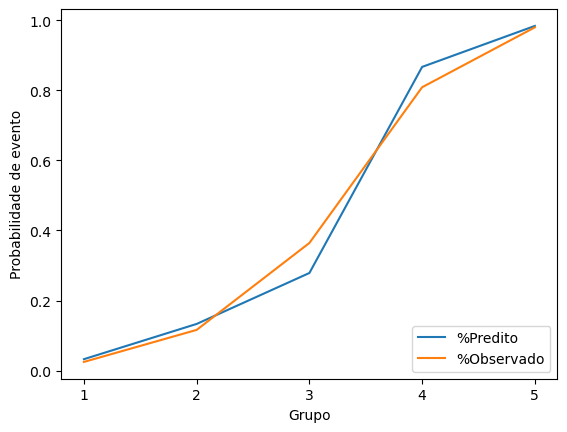

In [194]:
# - Compare graficamente o valor eperado versus observado (para a taxa de maus por grupo):

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid['pct_doente'].plot(label='%Predito')
ax = qualid['predito'].plot(label='%Observado')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')

In [195]:
acc = metrics.accuracy_score(df['flag_doente'], df['predito']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

##Gini
gini = 2*auc_ -1

#KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito'], df.loc[df['flag_doente'] != 1, 'predito']).statistic

print('GINI: {2:.2f}% \n KS: {0:.2f}%'
      .format(ks*100, auc_*100, gini*100))

Acurácia: 85.81%
GINI: 66.22% 
 KS: 75.09%


In [197]:
#'flag_doente ~ sex + cp + trestbps + age + chol + fbs + restecg + thalach + exang + oldpeak + slope + ca + thal'
#Acurácia: 85.81%
#GINI: 66.22% 
#KS: 75.09%
    
#'flag_doente ~ sex + cp + trestbps + age + chol + fbs + restecg + thalach + exang + oldpeak + slope + ca'
#Acurácia: 84.82%
#GINI: 66.22% 
#KS: 72.20%
     
#'flag_doente ~ sex + cp + trestbps + age + chol + fbs + restecg + thalach + exang + oldpeak + slope'
#Acurácia: 80.20%
#GINI: 66.22% 
#KS: 62.52%
    
#'flag_doente ~ sex + cp + trestbps + age + chol + fbs + restecg + thalach + exang + oldpeak'
#Acurácia: 80.20%
#GINI: 66.22% 
#KS: 61.91%
    
#'flag_doente ~ sex + cp + trestbps + age + chol + fbs + restecg + thalach + exang'
#Acurácia: 80.53%
#GINI: 66.22% 
#KS: 62.41%
    
#'flag_doente ~ sex + cp + trestbps + age + chol + fbs + restecg + thalach'
#Acurácia: 78.88%
#GINI: 66.22% 
#KS: 59.47%

#'flag_doente ~ sex + cp + trestbps + age + chol + fbs + restecg'
#Acurácia: 76.90%
#GINI: 66.22% 
#KS: 57.42%
    
#'flag_doente ~ sex + cp + trestbps + age + chol + fbs'
#Acurácia: 78.22%
#GINI: 66.22% 
#KS: 57.90%
    
#'flag_doente ~ sex + cp + trestbps + age + chol'
#Acurácia: 77.56%
#GINI: 66.22% 
#KS: 57.30%
    
#'flag_doente ~ sex + cp + trestbps + age'
#Acurácia: 77.89%
#GINI: 66.22% 
#KS: 58.40%   
    
#'flag_doente ~ sex + cp + trestbps'
#Acurácia: 77.23%
#GINI: 66.22% 
#KS: 54.09%    

#'flag_doente ~ sex + cp'
#Acurácia: 68.98%
#GINI: 66.22% 
#KS: 46.91%

#'flag_doente ~ sex + cp + trestbps + np.log(age)'
#Acurácia: 77.23%
#GINI: 66.22% 
#KS: 56.51% 

#'flag_doente ~ sex + cp + np.log(trestbps) + np.log(age)'
#Acurácia: 77.23%
#GINI: 66.22% 
#KS: 56.51%    

#'flag_doente ~ sex + np.log(cp) + np.log(trestbps) + np.log(age)'
#Acurácia: 75.58%
#GINI: 66.22% 
#KS: 53.31%   
    
#'flag_doente ~ sex + C(cp) + trestbps + age'   
#Acurácia: 79.54%
#GINI: 66.22% 
#KS: 59.30   
    
#'flag_doente ~ sex + cp + C(trestbps) + age'   
#Acurácia: 76.57%
#GINI: 66.22% 
#KS: 55.62%    